
# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> It's a nice opportunity to answer few questions I already had in mind which comes in handy now with this dataset in hands.

> Money vs art!   
what are my questions? to answer this question I would need to discover the dataset first! 



In [2]:
#Importing the expected required liberaries
#I also add more liberaries in the same cell whenever I discover it will be needed for future codes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

<a id='wrangling'></a>
## Data Wrangling

I would usually start by assessing the dataset I have in hand then check the questions I may find intersting and still possible to answer.

### Assessing Data

In [3]:
#   loading the dataset and viewing the first few lines
df_all = pd.read_csv('tmdb-movies.csv')
df_all.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#   Understanding the default shape of the dataset
df_all.shape

(10866, 21)

In [5]:
#   Displaying columns so I can figure out which ones are needed and which are not 
df_all.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
#   Deciding that some columns are not providing any helpful hands in answering some of my expected questions so I will drop these columns 
df_all.drop(['id','homepage','imdb_id','tagline','keywords','overview','release_date','production_companies','budget_adj','revenue_adj'],axis=1,inplace=True)

In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   cast            10790 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 933.9+ KB


In [8]:
#   As I am concerned with some financial question I will check the values given to budgets and revenues
df_all['budget'].value_counts()

0           5696
20000000     190
15000000     183
25000000     178
10000000     176
            ... 
51500000       1
25500000       1
1350000        1
7920000        1
4653000        1
Name: budget, Length: 557, dtype: int64

In [9]:
df_all['revenue'].value_counts()

0            6016
12000000       10
10000000        8
11000000        7
6000000         6
             ... 
53676580        1
617000          1
13001257        1
504050219       1
20518905        1
Name: revenue, Length: 4702, dtype: int64

##### Any analysis to a product (in our case "movies" won't be accurate in the absence of financial records -in my opinion- I would remove all records that has no info considering budget or revenue as I don't see the motive of analyzing these movies) 

> The challenge I have now is accuracy vs reality, as the database includes more than 10,000 rows it seems almost 4,000 have budget-revenue records where the remaining goes around 0 values for either budget or revenue, that for sure doesn't give me the best accurate graphs, yet analyzing only 3-4 thousand rows out of 10,00 might not be the best idea too. so I am creating two different datasets one is called all_df it incldues the 0 values and the 2nd is called df which includes only movies with data relevant to its budget investments and revenue.  with each diagram or graph I will play it on both datasets one by one so I could understand what differences that could give me. 

### Data Cleaning (Replace this with more specific notes!)

In [10]:
df = df_all[df_all.budget != 0]
df = df[df.revenue != 0]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3855 non-null   float64
 1   budget          3855 non-null   int64  
 2   revenue         3855 non-null   int64  
 3   original_title  3855 non-null   object 
 4   cast            3851 non-null   object 
 5   director        3854 non-null   object 
 6   runtime         3855 non-null   int64  
 7   genres          3855 non-null   object 
 8   vote_count      3855 non-null   int64  
 9   vote_average    3855 non-null   float64
 10  release_year    3855 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 361.4+ KB


In [12]:
df.drop_duplicates(keep ='first', inplace=True)

In [13]:
df.fillna(df.mean(),inplace=True)

In [14]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028
std,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


In [15]:
df.duplicated().sum()

0

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum().sum()

0

> Now let's discover the diffrance in histograms generated with original data of all moies vs histograms of movies with knows budget and revenues.

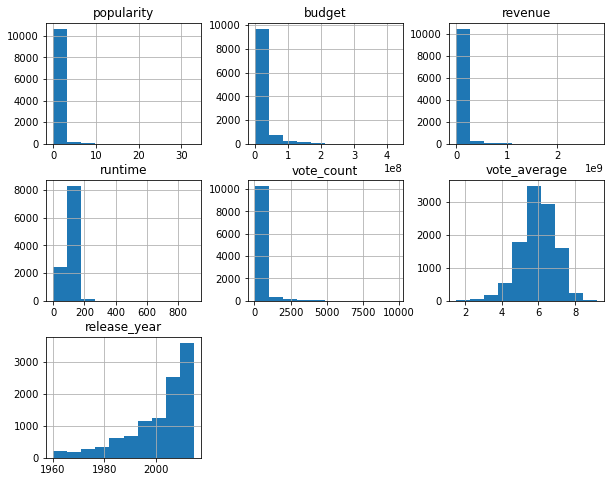

In [18]:
df_all.hist(figsize=(10,8));

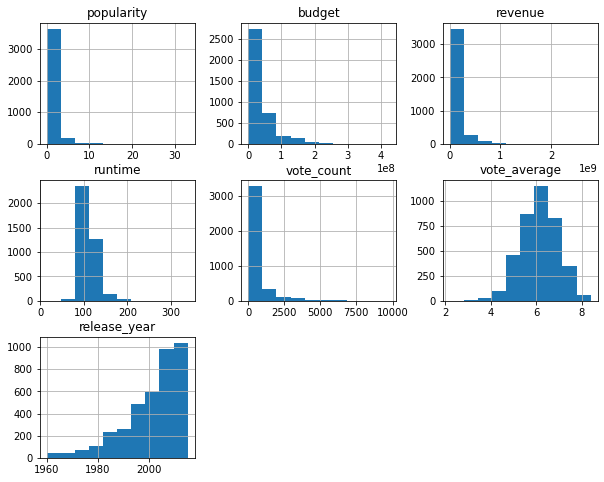

In [19]:
df.hist(figsize=(10,8));

<a id='eda'></a>
## Exploratory Data Analysis

> Answers I might be looking for could be 

#### 1- Most Popular Movie ever? 
#### 2- Popularity VS Voting Rate
#### 3- Least budget , but highest Revenue?
#### 4- What is the Average Runtime of a movie?

<a id='mostpopularmovie'></a>
## 1- Most Popular Movie ever? 

##### I will ask 2 questions here 
>1- What is the most popular movie ever 

>2- what is the most popular movie that made over than 100 million in rvenue. 

In [20]:
#To answer the second question I am interested in movies that exceeded the 100 million revenue 
high_revenue=df[df.revenue>=1000000000]

In [21]:
most_popular_film=high_revenue[high_revenue.popularity>=30]

In [22]:
most_popular_film

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015




## Jurassic World



>Now this Database tells me that " Jurassic World" is the most popular movie ever! , believe it or not I never seen it .. that could be a good reason to start watching it.  
Probably first thing I will do after submitting this project  

<a id='popbad'></a>
### 2- Popularity VS Voting Rate

>You may think most popular movies are the highest quality and vice versa .. let's discover this together 


In [23]:
#Let's show most popular movies 
most_popular_ever=df[df.popularity>=10]
most_popular_ever

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
629,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,6498,8.0,2014
630,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,121,Action|Science Fiction|Adventure,5612,7.9,2014
631,12.971027,170000000,714766572,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,136,Action|Adventure|Science Fiction,3848,7.6,2014
632,11.422751,20000000,78739897,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,101,Action|Thriller,2712,7.0,2014
633,10.739009,125000000,752100229,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,123,Science Fiction|Adventure|Thriller,3590,6.6,2014
634,10.174599,250000000,955119788,The Hobbit: The Battle of the Five Armies,Martin Freeman|Ian McKellen|Richard Armitage|K...,Peter Jackson,144,Adventure|Fantasy,3110,7.1,2014


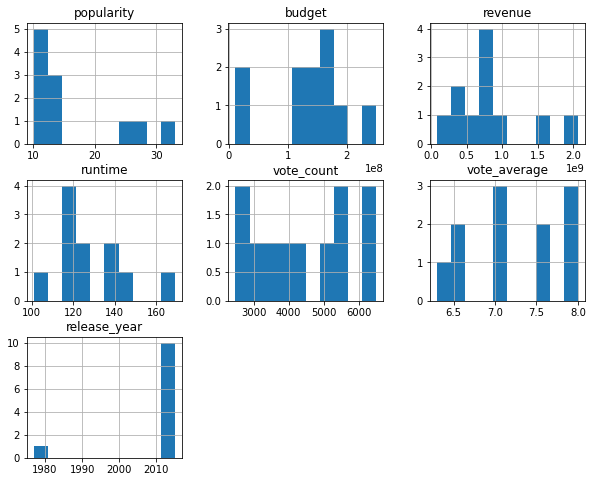

In [24]:
most_popular_ever.hist(figsize=(10,8));

## Not very Good, Yet popular

> what came as a suproise that (3 movies are rated less than 7 on imdb, yet they come amongst the most 11 popular movies ever)
Let's discover the names of these mvoies

In [25]:
least_rated_hp=most_popular_ever[most_popular_ever.vote_average<7]

In [26]:
least_rated_hp

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
633,10.739009,125000000,752100229,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,123,Science Fiction|Adventure|Thriller,3590,6.6,2014


> So eventhough they seem to be pretty much popular at least I have heard of The hunger Games, yet they are not receiving the highest rating on imdb 6.3 - 6.6 !  that's good to know 


<a id='leastbud'></a>
### 3- Least budget , but highest Revenue?

>It would be interesting (as an investor) to know the possibility of receiving a very high revenue while spending as less money as possible ... is it possible ?  Let's check that ! 

In [27]:
#movies with budget less than 1 million 
least_budget=df[df.budget<=1000000]

In [28]:
least_budget=least_budget[least_budget.budget<=1000000]

In [29]:
high_profit=least_budget[least_budget.revenue>=50000000]

In [30]:
high_profit

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
136,1.191138,1000000,62882090,Unfriended,Shelley Hennig|Moses Jacob Storm|Renee Olstead...,Levan Gabriadze,82,Horror|Thriller,643,5.6,2015
2449,0.934621,25000,248000000,The Blair Witch Project,Heather Donahue|Michael C. Williams|Joshua Leo...,Daniel Myrick|Eduardo SÃ¡nchez,81,Horror|Mystery,522,6.3,1999
4560,0.491648,1000000,101758490,The Devil Inside,Fernanda Andrade|Simon Quarterman|Evan Helmuth...,William Brent Bell,83,Thriller|Horror,162,4.5,2012
6082,2.834739,1000000,51525171,The Breakfast Club,Emilio Estevez|Anthony Michael Hall|Judd Nelso...,John Hughes,97,Comedy|Drama,1139,7.6,1985
7057,0.762134,130000,54667954,Open Water,Blanchard Ryan|Daniel Travis|Saul Stein|Michae...,Chris Kentis,79,Drama|Thriller,171,5.3,2004
7316,1.246420,550000,59754601,Friday the 13th,Betsy Palmer|Adrienne King|Harry Crosby|Laurie...,Sean S. Cunningham,95,Horror,282,6.4,1980
7447,1.120442,15000,193355800,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,Oren Peli,86,Horror|Mystery,714,6.1,2007
7827,2.012021,400000,100000000,Mad Max,Mel Gibson|Joanne Samuel|Hugh Keays-Byrne|Stev...,George Miller,93,Adventure|Action|Thriller|Science Fiction,667,6.5,1979
8897,1.161942,1000000,78868508,48 Hrs.,Nick Nolte|Eddie Murphy|Annette O'Toole|Frank ...,Walter Hill,96,Thriller|Action|Comedy|Crime|Drama,171,6.1,1982
10495,0.772494,113,115103979,"The Karate Kid, Part II",Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,John G. Avildsen,113,Adventure|Drama|Action|Romance|Family,211,5.8,1986


In [31]:
highest_profit=least_budget[least_budget.revenue>=120000000]

In [32]:
highest_profit

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
2449,0.934621,25000,248000000,The Blair Witch Project,Heather Donahue|Michael C. Williams|Joshua Leo...,Daniel Myrick|Eduardo SÃ¡nchez,81,Horror|Mystery,522,6.3,1999
7447,1.120442,15000,193355800,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,Oren Peli,86,Horror|Mystery,714,6.1,2007


> Surprisingly enough we have 14 movies that had a budget of less than 1 million dollars while generated a revenue that exceeded 50 millions!! 
Wow that is a profitable business!!  but what are these movies?

> Now it is getting more interesting I though of downsizing the results into movies that was budgeting less than a million but getting a revenue of ver than 120 millions .. sounds crazy hah?!! 

> guess what 2 movies were able to meet this criteria, and not surprisingly they both were horro movies!!
> does that explain why many cheap horror movies are being produced? they think one of them might become a hit and do what Paranormal activity has done in 2007 ... ! also the Blair Witch Project was a profit business there

In [33]:
highest_profit.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
2449,0.934621,25000,248000000,The Blair Witch Project,Heather Donahue|Michael C. Williams|Joshua Leo...,Daniel Myrick|Eduardo SÃ¡nchez,81,Horror|Mystery,522,6.3,1999
7447,1.120442,15000,193355800,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,Oren Peli,86,Horror|Mystery,714,6.1,2007


> From an ethical point of view is it good manipulating the adrenaline levels in human bodies for the sake of making such a huge return on investment... that's a question that needs an answer! an analyst might not have an answer but definitley could help by providing such numbers . 

> Conclusion
Highest revene generating movies are released between 1995 and 2015 
that shows the evolution of the movies industry (not only this) 
7 high revenue generating movies were released in 2015 alon compared to only 1 per year from 2005 till 2010

> Believe it or not long movies still could generate high revenue (2 movies that exceeded the 3 hours and yet they made more than 100 millions in revenue 

> You would expect all movies with revenue above 100 million to be so popular ! alright not very accurate that's what this figure shows 

<a id='runtime'></a>
## 4- Average Runtime of movies 


In [34]:
# function to calculate the average Runtime
def avg_Rt(column):
    return df[column].mean()

def avg_Rt_all(column):
    return df_all[column].mean()

In [35]:
#Calculating Avergae Runtime using prev. function
print('The Average Runtime for movies that we have records of their budget and revenues is {} minutes'.format(avg_Rt('runtime')))

The Average Runtime for movies that we have records of their budget and revenues is 109.21745908028059 minutes


In [36]:
#Calculating Avergae Runtime using prev. function
print('The Average Runtime for movies in the whole database is {} minutes'.format(avg_Rt_all('runtime')))

The Average Runtime for movies in the whole database is 102.07086324314375 minutes


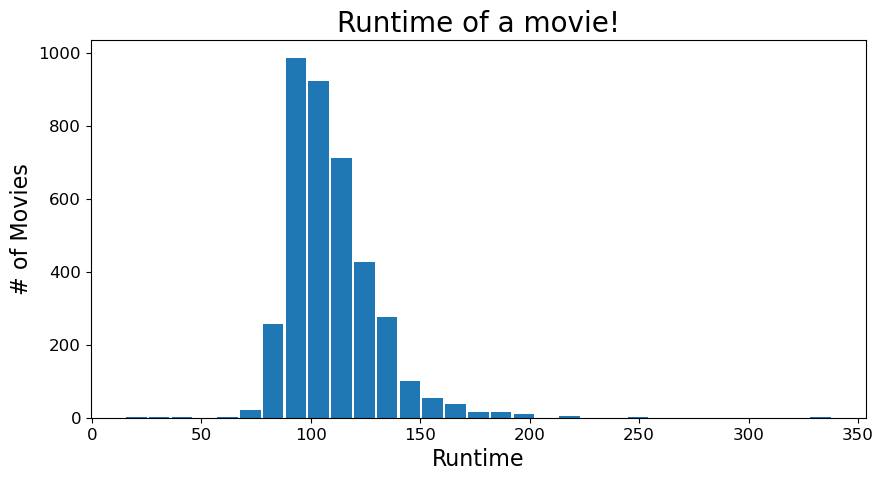

In [37]:
#Runtime average per movie
plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 12)

plt.figure(figsize=(10,5), dpi = 100)
#xaxis
plt.xlabel('Runtime', fontsize = 16)
#yaxis
plt.ylabel('# of Movies', fontsize=16)
#Title
plt.title('Runtime of a movie!', fontsize=20)

plt.hist(df['runtime'], rwidth = 0.9, bins =31)
plt.show();

##### It shows that most of the time you would expect a movie to last for an hour and half!

<a id='scat'></a>
### 5-High Revenue Movies vs Imdb Rating!

In [97]:
#Define Movies with very high revenue 
movies_plt=df[df.revenue>=1500000000]

In [98]:
movies_plt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5231
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      6 non-null      float64
 1   budget          6 non-null      int64  
 2   revenue         6 non-null      int64  
 3   original_title  6 non-null      object 
 4   cast            6 non-null      object 
 5   director        6 non-null      object 
 6   runtime         6 non-null      int64  
 7   genres          6 non-null      object 
 8   vote_count      6 non-null      int64  
 9   vote_average    6 non-null      float64
 10  release_year    6 non-null      int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 576.0+ bytes


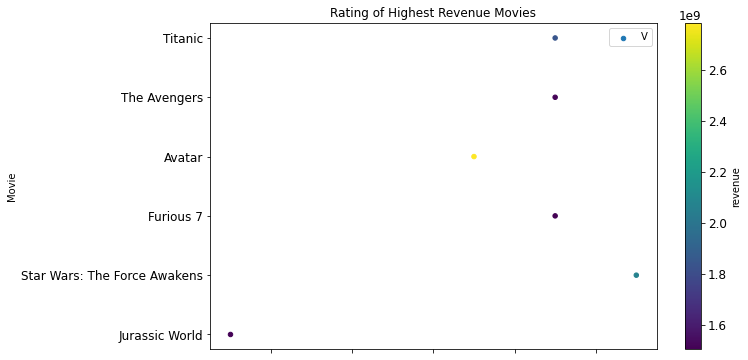

In [99]:
#Scatter plot for 2D variables (Title, Revenue)
ax3 = movies_plt.plot.scatter(x='vote_average',y='original_title',c='revenue',colormap='viridis',figsize=(10,6),title='Rating of Highest Revenue Movies')
plt.xlabel('The Revenue')
plt.ylabel('Movie')
plt.legend('Value');

> In this scatter plot we can see not only the rating of each movie but also the revenue achieved so 2D variables within one plot 

> While we can see that Jurrasic world is receiving the lowest imdb average voting the dark blue color shows it doesn't make much revenue as well.

>While the yello dot of Avatar shows us it has the most revenue of all movies, and not a very bad rating as the yellow dot comes in a position just before Titanic and the Avengers

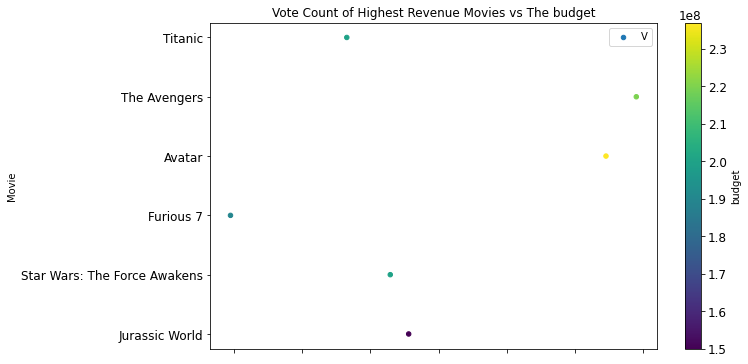

In [100]:
#Scatter plot for 2D variables (Title, Revenue)
ax3 = movies_plt.plot.scatter(x='vote_count',y='original_title',
                      c='budget',
                      colormap='viridis',figsize=(10,6),title='Vote Count of Highest Revenue Movies vs The budget')
plt.xlabel('Revenue')
plt.ylabel('Movie')
plt.legend('Value');

>In this plot we can see the Avatar had the highest budget for a movie (the bright yelow color tells us that, also it comes second in the vote count after The Avengers

<a id='fun'></a>
## Now for fun let's discover some popular movies' names

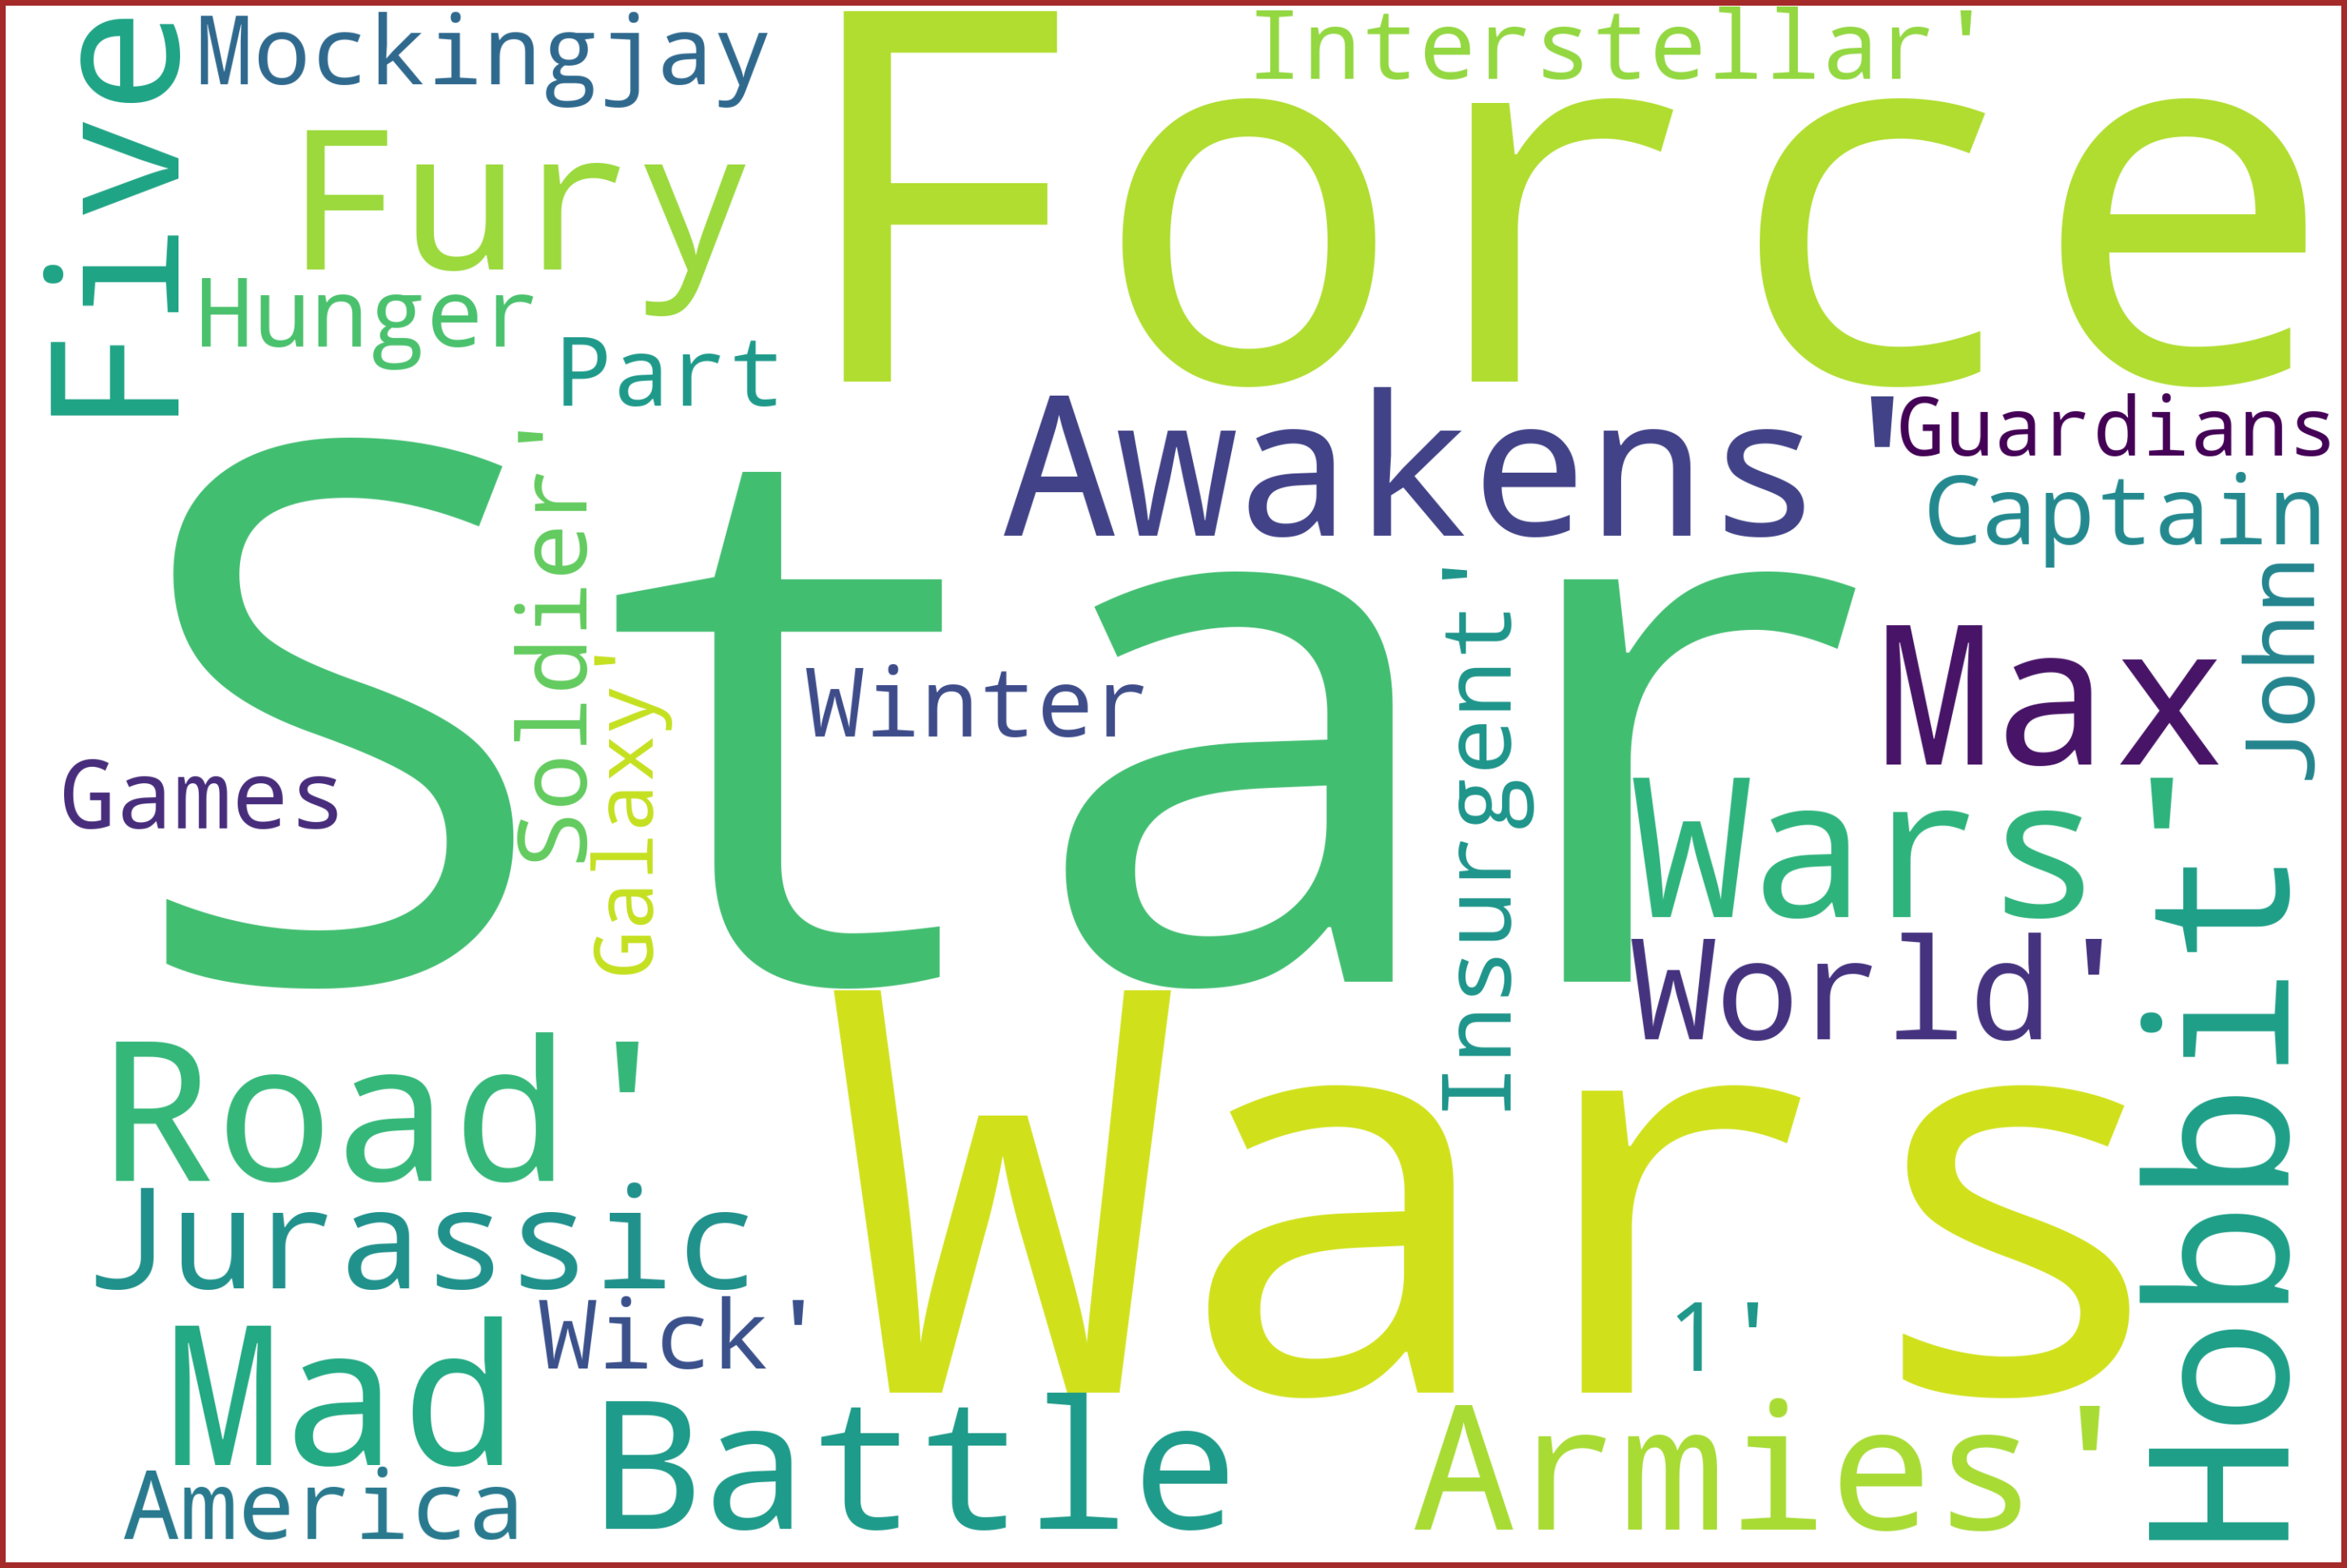

In [101]:
names_list = most_popular_ever.original_title.value_counts().index.tolist()
text = names_list
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig_4 = plt.figure(
    figsize = (40, 30),
    facecolor = 'brown',
    edgecolor = 'blue')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
fig_4.savefig('All_Movies.png');

> Conclusion 
<ul>
<li><a href="#mostpopularmovie">Most Popular Movie is Jurassic World</a></li>
<li><a href="#popbad">Very Popular doesn't mean the best</a></li>
<li><a href="#leastbud">Pay less, Earn more!</a></li>
<li><a href="#runtime">Runtime</a></li>
<li><a href="#scat">Highest Revenue movies stats!</a></li>
<li><a href="#fun">Fun Time!</a></li>
</ul>


### Conclusion

> I had few questions to answer.
1- What was the most popular movie? 
- I was surprised it was Jurassic World of 2015! 

>2-What does most popular mean? 
- I was searching for movies like (GodFather triology ! yet even though it is quiet poular it was not the most and surprisingly not all the popular movies are very good rated 
- Yet, I found it is not a bad idea to start watching some start wars movies as I may start getting some of their memes! 

>3-Money talks? hwo to make the most profit out of this industry! 
- I searched amongst the least budgeted movies while still making a very high revenue 
- The answer was (The Adrenaline rush) horror movies win! 
- When I discovered a movie like paranormal activity is  12,890% profitable (that is crazy!! No other industry could generate a similar profit not even close to it's 10th!! 

##### Limitations
>While I could find some of my answers as logic as it seems like horror movies for example, yet I want to clarify that a 100% accurate answer may not exist within this analysis. like you may not spend $15,000 on a movie expecting millions of dollars in return just because it is horro! Also be aware of that my statistics can only be treated as indicators and not generalized due to the many removed entries from the dataset, due to missing values.
